In [252]:
# Import packages
import numpy as np
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

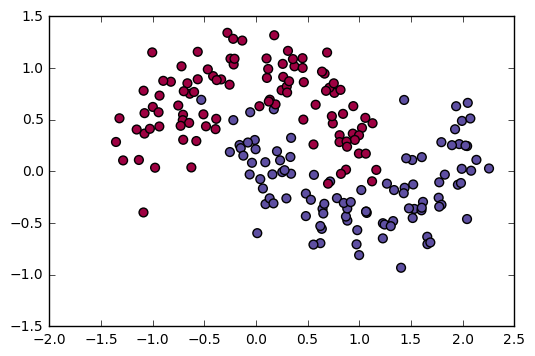

In [253]:
# Generate a toy dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [254]:
# Define helper functions

def predict(W, X):
    
    # Forward pass
    z_h1 = np.dot(X, W['W_input_h1']) + W['b_input_h1']
    a_h1 = np.tanh(z_h1)

    z_h2 = np.dot(a_h1, W['W_h1_h2']) + W['b_h1_h2']
    a_h2 = np.tanh(z_h2)
    output = np.dot(a_h2, W['W_h2_output']) + W['b_h2_output']

    probs = sigmoid(output)
    probs = probs.squeeze()
    
    predictions = np.zeros(probs.shape[0])
    predictions[probs>0.5] = 1
    
    return predictions

def cross_entropy_loss(t_hat, t):
    return np.sum(-(t*np.log(t_hat) + (1-t)*np.log(1-t_hat)))

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_grad(x):
    return sigmoid(x)*(1-sigmoid(x))

def tanh_grad(x):
    return 1 - np.tanh(x)**2

def plot_decision_boundary(W):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = predict(W, np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral) 

In [255]:
# Create the model architecture
input_dim = 2
nodes_hidden_1 = 3
nodes_hidden_2 = 3
output_dim = 1

W = {
    'W_input_h1' : np.random.rand(input_dim, nodes_hidden_1),
    'W_input_h1' : np.random.rand(input_dim, nodes_hidden_1),
    'b_input_h1' : np.random.rand(nodes_hidden_1),

    'W_h1_h2' : np.random.rand(nodes_hidden_1, nodes_hidden_2),
    'b_h1_h2' : np.random.rand(nodes_hidden_2),

    'W_h2_output' : np.random.rand(nodes_hidden_2, output_dim),
    'b_h2_output' : np.random.rand(output_dim)
}

In [256]:
# Train using Gradient Descent

learning_rate = 0.01
reg_lambda = 0.01
no_epochs = 2000

for epoch in range(no_epochs):

    # Forward pass
    z_h1 = np.dot(X, W['W_input_h1']) + W['b_input_h1']
    
    a_h1 = np.tanh(z_h1)

    z_h2 = np.dot(a_h1, W['W_h1_h2']) + W['b_h1_h2']
    a_h2 = np.tanh(z_h2)
    output = np.dot(a_h2, W['W_h2_output']) + W['b_h2_output']

    probs = sigmoid(output)
    probs = probs.squeeze()
    
    
    # Backward Pass 
    # Gradient Descent
    # Take derivative of the loss function wrt W_h2_output, a_h2, and b_h2_output
    der_probs = (probs-y)/(probs*(1-probs)) # (200,)
    der_output = der_probs.reshape(200,1) * sigmoid_grad(output)
    
    der_W_h2_output = np.matmul(a_h2.T, der_output) # + reg_lambda * W['W_h2_output'] # (200,3)
    der_a_h2_output = np.matmul(der_output, W['W_h2_output'].T)

    der_b_h2_output = np.sum(der_output)

    # Take derivative wrt W_h1_output, a_h1, and b_h1_output
    der_z_h2 = der_a_h2_output * tanh_grad(z_h2)
    der_W_h1_h2 = np.matmul(a_h1.T, der_z_h2) # + reg_lambda * W['W_h1_h2'] # (3,3)

    der_a_h1_output = np.matmul(der_z_h2, W['W_h1_h2'].T)
    der_b_h1_h2 = np.sum(der_z_h2)

    # Take derivative wrt to z_h1, W_input_h1, and b_input_h1
    der_z_h1 = der_a_h1_output * tanh_grad(z_h1)
    der_W_input_h1 = np.matmul(X.T, der_z_h1) # + reg_lambda * W['W_input_h1'] #(2,3)
    der_b_input_h1 = np.sum(der_z_h1)
    
    # update weight
    W['W_input_h1'] = W['W_input_h1'] - learning_rate * der_W_input_h1
    W['b_input_h1'] = W['b_input_h1'] - learning_rate * der_b_input_h1
    W['W_h1_h2'] = W['W_h1_h2'] - learning_rate * der_W_h1_h2
    W['b_h1_h2'] = W['b_h1_h2'] - learning_rate * der_b_h1_h2
    W['W_h2_output'] = W['W_h2_output'] - learning_rate * der_W_h2_output
    W['b_h2_output'] = W['b_h2_output'] - learning_rate * der_b_h2_output
    
    loss = cross_entropy_loss(probs, y)
    
    if epoch%100 == 0:
        print("Loss after epoch ", epoch, " : ", loss)

('Loss after epoch ', 0, ' : ', 241.26341420458925)
('Loss after epoch ', 100, ' : ', 61.627030399300111)
('Loss after epoch ', 200, ' : ', 58.590579393966628)
('Loss after epoch ', 300, ' : ', 60.204823481877085)
('Loss after epoch ', 400, ' : ', 38.055354118078533)
('Loss after epoch ', 500, ' : ', 15.476261226835732)
('Loss after epoch ', 600, ' : ', 17.488965398612319)
('Loss after epoch ', 700, ' : ', 16.623479171363844)
('Loss after epoch ', 800, ' : ', 16.156665595130807)
('Loss after epoch ', 900, ' : ', 13.85049646840865)
('Loss after epoch ', 1000, ' : ', 13.625481732949009)
('Loss after epoch ', 1100, ' : ', 13.520218186380117)
('Loss after epoch ', 1200, ' : ', 13.444349458170123)
('Loss after epoch ', 1300, ' : ', 13.368650601767357)
('Loss after epoch ', 1400, ' : ', 13.281919504000321)
('Loss after epoch ', 1500, ' : ', 13.20322599504477)
('Loss after epoch ', 1600, ' : ', 13.128920006492088)
('Loss after epoch ', 1700, ' : ', 13.041568837140208)
('Loss after epoch ', 18

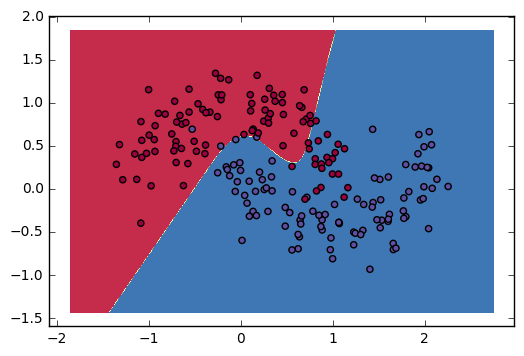

In [257]:
plot_decision_boundary(W)